In [2]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
from numpy.linalg import svd
from numpy.random import randn
from sklearn.preprocessing import scale




In [3]:
x = np.array([[1,1,1,1,6,7,8,9,10],
            [5,6,7,4,5,6,4,6,7],
            [0.2,0.1,0.4,0.2,0.4,0.8,0.5,0.6,0.3],
            [143.1,12.4,16.7,18.2,199.0,5.5,34.6,7.8,98.2]])
# print(np.mean(x, axis = 1))
# X = x - np.mean(x, axis=1).reshape((-1,1))
# print(X)
# X = scale(x, axis =1,with_std=False)
# Cx = X.dot(x.T)/x.shape[1]
# print(Cx)
# u,s,v = svd(Cx)
# print(u[:,:3])
# sum(s[:3])

In [21]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
from numpy.linalg import svd
from numpy.random import randn
from sklearn.preprocessing import scale

In [22]:
# 1. 2. pca function implementation
def pca(x, param, mode = "preserve_var", c_mode = "f_wise", norm = "none"):
    # input: x: data matrix in R^(M*N); M dimension, N samples
    #        param: target dimention K or target conserved variance \alpha
    #        mode: "fixe_K" or "preserve_var"
    #        c_mode: the mode of the mean shifting
    #        norm: the mode of the normalization to unit variance
    #              f_wise:feature wise;
    #              s_wise:sample wise;
    #              none: no shift/variance normalization

    (M,N) = x.shape
    
    if c_mode == "f_wise":
        mu = np.mean(x, axis = 1).reshape((M, 1)) # make sure its a column vector
#         X = scale(x, axis = 1, with_std = False)
    elif c_mode == "s_wise":
        mu = np.mean(x, axis = 0).reshape((1, N))
#         X = scale(x, axis = 0, with_std = False)
    else:
        mu = 0
#         X = x
    X = x - mu
    
    if norm == "f_wise":
        sigma = np.std(x, axis = 1).reshape((M, 1))
#         X = scale(X, axis = 1, with_mean = False)
    elif norm == "s_wise":
        sigma = np.std(x, axis = 0).reshape((1, N))
#         X = scale(X, axis = 0, with_mean = False)
    else:
        sigma = 1
    X = X/sigma
        
    C_X = X.dot(X.T)/(X.shape[1]-1) # nomalize with N-1 since we want unbiased covariance matrix       
    ei_vec, s, v = svd(C_X)
    ei_val = s#**2
    
    if mode is "preserve_var":
        # Compute K
        ei_val_sum = sum(ei_val)
        K = 1
        while (sum(ei_val[:K])/ei_val_sum < param):
            K =+ 1
    elif mode is "fixed_K":
        K = param
    else:
        raise ValueError("mode must be")
    W = ei_vec[:,:K]
    Y = W.T.dot(x)
    
    return (Y,W,mu,sigma)





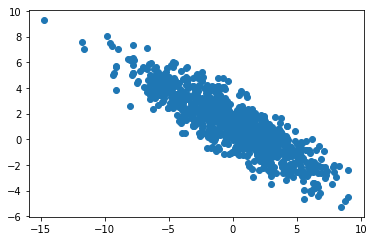

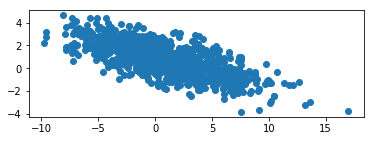

In [23]:
# 3. data generation
P = np.array([[0.5, -0.866],[0.866, 0.5]])
X = P.dot(np.array([[1],[4]])*randn(2,1000)+np.array([[1],[0.5]]))# 1,4 are variance

# 4. scatter plot of the data
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.scatter(X[0,:], X[1,:])
ax.set_aspect('equal')
plt.show()
# plt.plot(X[0,:], X[1,:], 'b.')

# 5. Choose an appropriate mode for mean shift and vari ance normalization and per-
# form PCA on the given dataset.
k = 2
# Y, W, mu, sigma = pca(X, 0.9, mode = "preserve_var", c_mode = "f_wise", norm = "f_wise")
Y, W, mu, sigma = pca(X, k, mode = "fixed_K", c_mode = "f_wise", norm = "f_wise")
# 6. Plot the principal components into your scatterplot. Check if your results make sense.
fig = plt.figure(2)
ax = fig.add_subplot(111)
ax.scatter(Y[0,:], Y[1,:])
ax.set_aspect('equal')
plt.show()


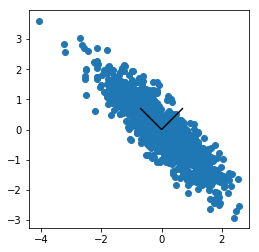

In [24]:
# 7. Reduce the dimensionality to one and plot the projected data into another plot.
X_norm = (X - mu)/sigma

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.scatter(X_norm[0,:], X_norm[1,:])
plt.arrow(0, 0, W[0,0], W[1,0])
plt.arrow(0, 0, W[0,1], W[1,1])
ax.set_aspect('equal')
plt.show()

In [8]:
np.zeros((1,3))

array([[0., 0., 0.]])